In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 1.xlsx')

In [3]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)
print(raw_data)

          Emg1    Emg2    Emg3    Emg4    Emg5    Emg6    Emg7    Emg8  \
0       0.0684  0.0024  0.0024  0.0024  0.0024  0.0098  0.0024  0.0488   
1       0.0586  0.0024  0.0024  0.0024  0.0024  0.0049  0.0024  0.0415   
2       0.0562  0.0024  0.0024  0.0024  0.0024  0.0049  0.0024  0.0391   
3       0.0562  0.0024  0.0024  0.0024  0.0024  0.0049  0.0024  0.0342   
4       0.0488  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0366   
...        ...     ...     ...     ...     ...     ...     ...     ...   
471478  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0562   
471479  0.0024  0.0024  0.0024  0.0024  0.0024  0.0049  0.0024  0.0513   
471480  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0513   
471481  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0488   
471482  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0439   

          Emg9   Emg10  repetition  rerepetition  stimulus  restimulus  
0       0.0024  0.0342           0    

In [4]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)
print(raw_data)

          Emg1    Emg2    Emg3    Emg4    Emg5    Emg6    Emg7    Emg8  \
0       0.0684  0.0024  0.0024  0.0024  0.0024  0.0098  0.0024  0.0488   
1       0.0586  0.0024  0.0024  0.0024  0.0024  0.0049  0.0024  0.0415   
2       0.0562  0.0024  0.0024  0.0024  0.0024  0.0049  0.0024  0.0391   
3       0.0562  0.0024  0.0024  0.0024  0.0024  0.0049  0.0024  0.0342   
4       0.0488  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0366   
...        ...     ...     ...     ...     ...     ...     ...     ...   
471478  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0562   
471479  0.0024  0.0024  0.0024  0.0024  0.0024  0.0049  0.0024  0.0513   
471480  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0513   
471481  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0488   
471482  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0439   

          Emg9   Emg10  repetition  rerepetition  stimulus  restimulus  
0       0.0024  0.0342           0    

In [5]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)


In [7]:
from sklearn.ensemble import RandomForestClassifier
clf_lr = RandomForestClassifier()

In [8]:
rfecv = RFECV(estimator=clf_lr, step=1, cv=5, scoring='accuracy')
rfecv = rfecv.fit(x_train, y_train)
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 10
Best features : Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10'],
      dtype='object')


In [9]:
rfecv.grid_scores_

C:\Users\nafem\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


array([[0.54311568, 0.545166  , 0.54425913, 0.54580762, 0.54440786],
       [0.56353994, 0.56162763, 0.56300765, 0.56303846, 0.56293989],
       [0.6275136 , 0.62747417, 0.63703572, 0.63834947, 0.63590482],
       [0.72488368, 0.72025077, 0.72167022, 0.72458254, 0.7200481 ],
       [0.80721158, 0.80409668, 0.80650185, 0.80346194, 0.80229876],
       [0.86051968, 0.85801593, 0.85984938, 0.85763855, 0.85951146],
       [0.89241779, 0.8901309 , 0.8929698 , 0.88987244, 0.89109477],
       [0.90692769, 0.9042268 , 0.9054491 , 0.9043432 , 0.90489522],
       [0.91501065, 0.91469521, 0.91558237, 0.91339235, 0.91406265],
       [0.92141787, 0.91993928, 0.9214573 , 0.9194054 , 0.92119946]])

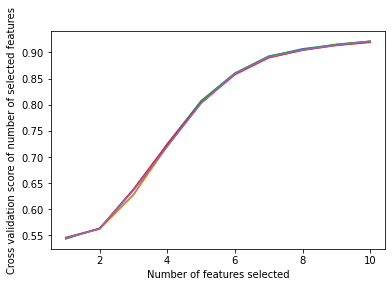

In [10]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [11]:
x_train_rfecv = rfecv.transform(x_train)
x_test_rfecv = rfecv.transform(x_test)